
 **Cirrhosis Data**\
**Complete Exploratory Data Analysis**\
Performed by : Ishrat Un Nisa\
Dated : December 2023\
email : ishratbadar@gmail.com

## About Dataset
Dataset downloaded from (https://www.kaggle.com/competitions/playground-series-s3e26/data)
### Context
The dataset (train dataset) is from kaggle playground competition  was generated from a deep learning model trained on the Cirrhosis Patient Survival Prediction dataset. Feature distributions are close to, but not exactly the same, as the original.
### Files
train.csv - The training dataset; Status is the categorical target; C (censored) indicates the patient was alive at N_Days, CL indicates the patient was alive at N_Days due to liver transplant, and D indicates the patient was deceased at N_Days.

test.csv - The test dataset; the objective is to predict the probability of each of the three Status values (Status_C, Status_CL, Status_D)

sample_submission.csv - A sample submission file in the correct format.

# Objective:
Exploratory Data Analysis (EDA) to analyze data for checking patterns and getting insight from it

Kernel : Python 3.12.1

## To do list
1. Import libraries
2. Load dataset
3. Analyze and understanding dataset (Anomalies, relationship, missing values, etc)
4. Remove anamolies from data by dealing missing data and other information
5. Feature engineering
6. Getting insight from data by applying various techniques 

# 1. Import following libraries
 - Panadas
 - Numpy
 - Matplotlib
 - Seaborn
 - Scipy

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# import all relevant libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
# To show the plot in the notebook itself instead of opening a new window for the plot
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 2. Load Dataset

In [2]:
# df = pd.read_csv('/kaggle/input/playground-series-s3e26/train.csv')
df = pd.read_csv('./Data/train.csv')

# To check complete dataset (column wise and row wise)
pd.set_option('display.max_columns', None)    # this is to display all the columns in the dataframe
pd.set_option('display.max_rows', None)       # this is to display all the rows in the dataframe

# 3. Analyze data

In [3]:
# To look into data
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [4]:
# Find the Structure or size of Dataset and check the Descriptive Analysis
print('Shape of dataset : ',df.shape)
df.describe()

Shape of dataset :  (7905, 20)


,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [5]:
# Seems no missing value, just to confirm it
df.isnull().sum().any()

False

In [6]:
# check any duplication
df.duplicated(subset=df.columns.difference(['id'])).any()

False

---
# Observation 1
1. There is no missing values in the datset
2. there is no duplicates in the dataset

Check Unique values in all the columns along with maximum and minimum values in the Numerical columns


In [7]:
# Check Unique values of each column
for column in df.columns:
    unique_values = df[column].unique()
    type_value = df[column].dtype
    if len(unique_values) > 10:
        unique_values = unique_values[:10]
    total_unique_values = df[column].nunique()
    print(f"Data Type of {column}: {type_value}")
    print(f"Total Unique values in {column}: {total_unique_values}")
    if (df[column].dtype == 'int64') or (df[column].dtype == 'float64'):
    # if pd.api.types.is_numeric_dtype(df[column]):
    # if np.issubdtype(df[column].dtype, np.number):
       print(f"Minimum value: {df[column].min()},   Maximum value: {df[column].max()}")
    print(f"Unique values in {column}: {unique_values}\n")
    

Data Type of id: int64
Total Unique values in id: 7905
Minimum value: 0,   Maximum value: 7904
Unique values in id: [0 1 2 3 4 5 6 7 8 9]

Data Type of N_Days: int64
Total Unique values in N_Days: 461
Minimum value: 41,   Maximum value: 4795
Unique values in N_Days: [ 999 2574 3428 2576  788  703 1300 1615 2050 2615]

Data Type of Drug: object
Total Unique values in Drug: 2
Unique values in Drug: ['D-penicillamine' 'Placebo']

Data Type of Age: int64
Total Unique values in Age: 391
Minimum value: 9598,   Maximum value: 28650
Unique values in Age: [21532 19237 13727 18460 16658 19270 17703 21281 20684 15009]

Data Type of Sex: object
Total Unique values in Sex: 2
Unique values in Sex: ['M' 'F']

Data Type of Ascites: object
Total Unique values in Ascites: 2
Unique values in Ascites: ['N' 'Y']

Data Type of Hepatomegaly: object
Total Unique values in Hepatomegaly: 2
Unique values in Hepatomegaly: ['N' 'Y']

Data Type of Spiders: object
Total Unique values in Spiders: 2
Unique values in S

Age
Skew : 0.08


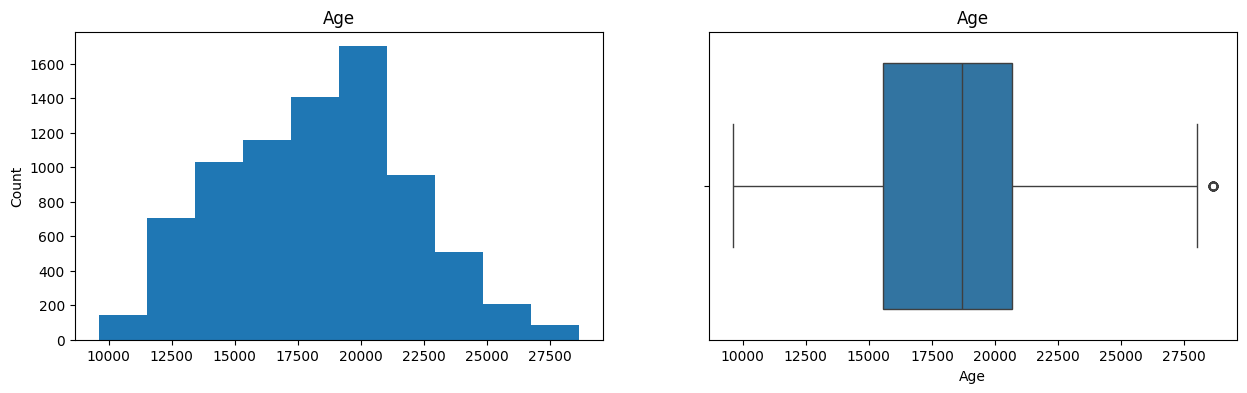

Albumin
Skew : -0.56


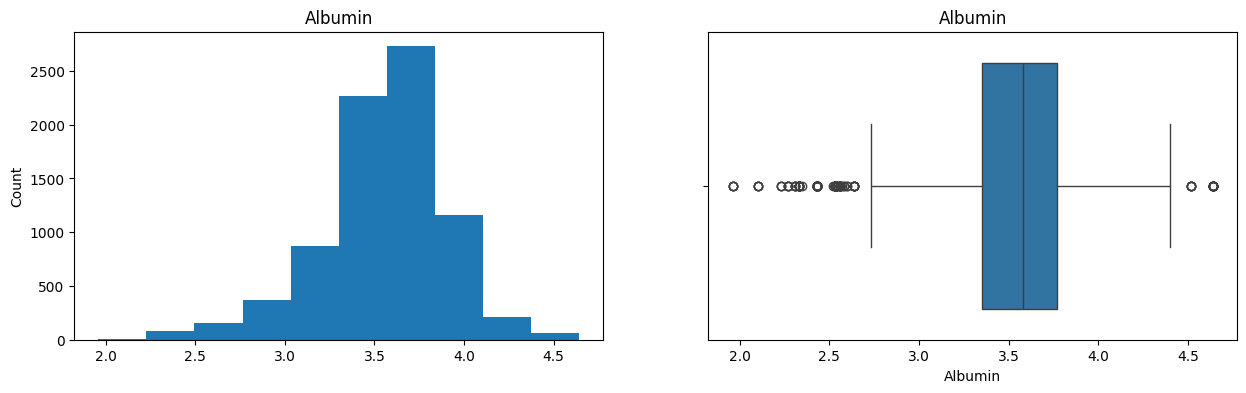

Alk_Phos
Skew : 3.2


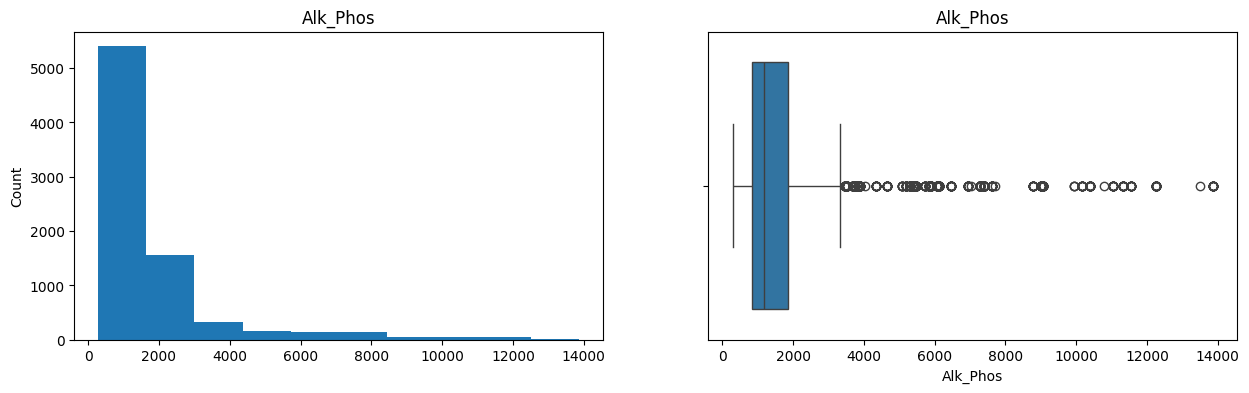

Bilirubin
Skew : 3.34


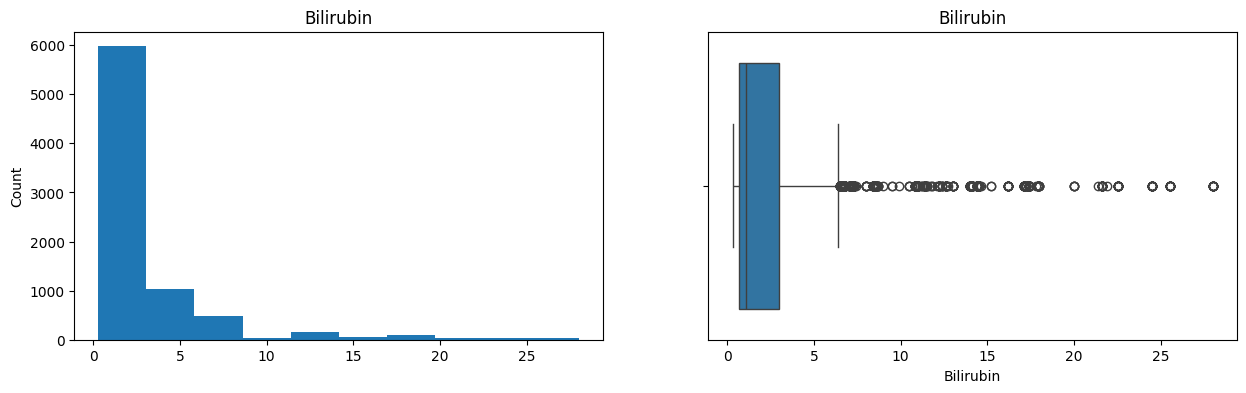

Cholesterol
Skew : 3.68


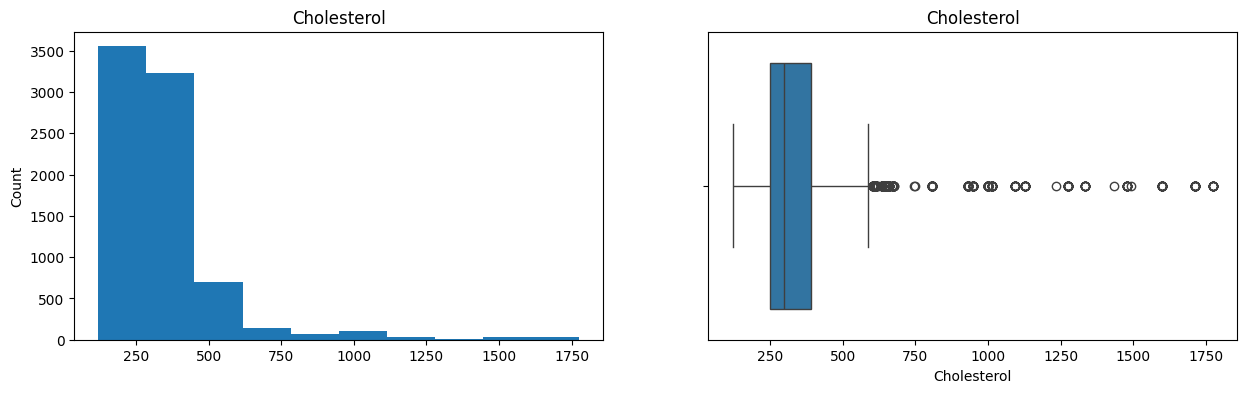

Copper
Skew : 2.7


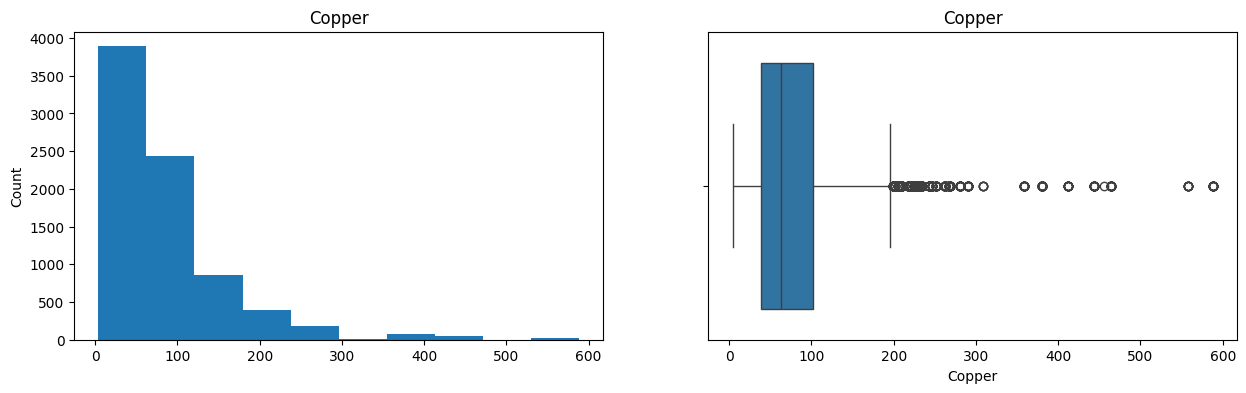

N_Days
Skew : 0.45


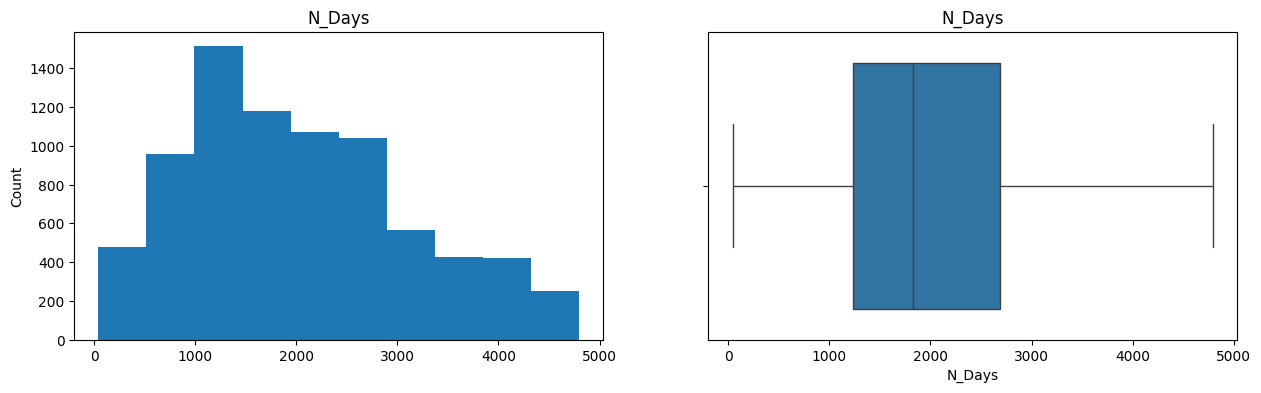

Platelets
Skew : 0.42


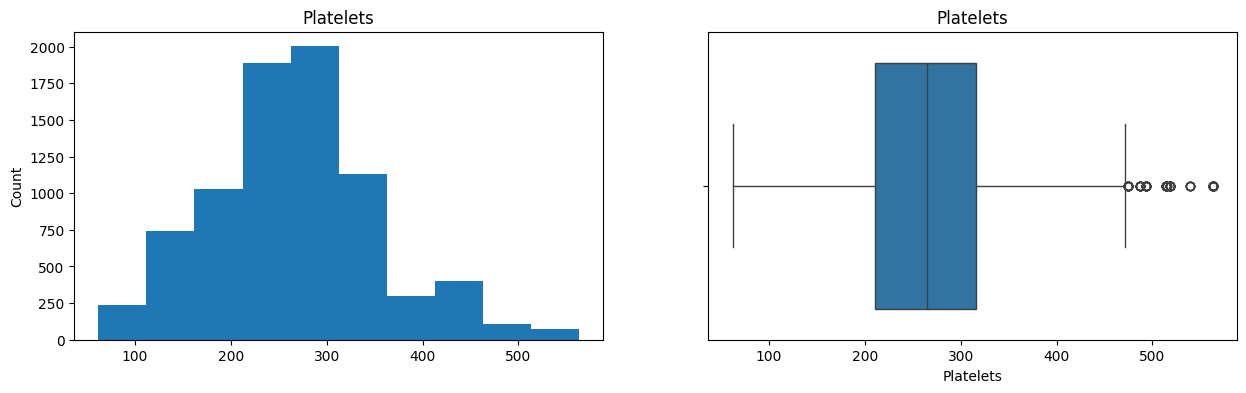

Prothrombin
Skew : 1.29


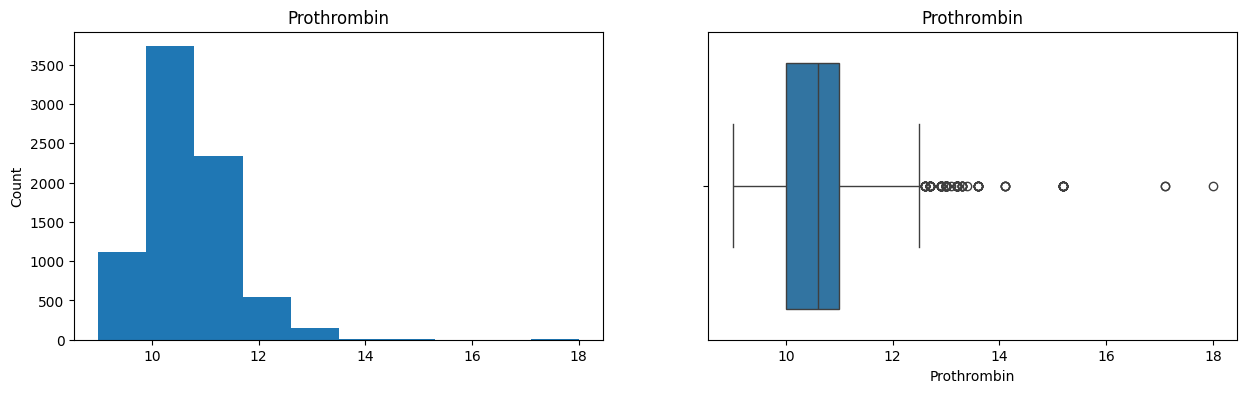

SGOT
Skew : 1.53


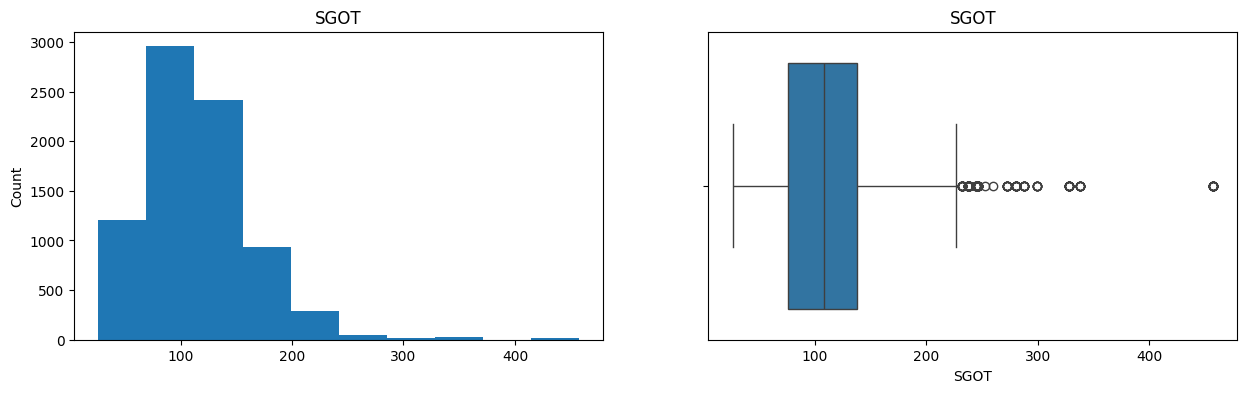

Stage
Skew : -0.53


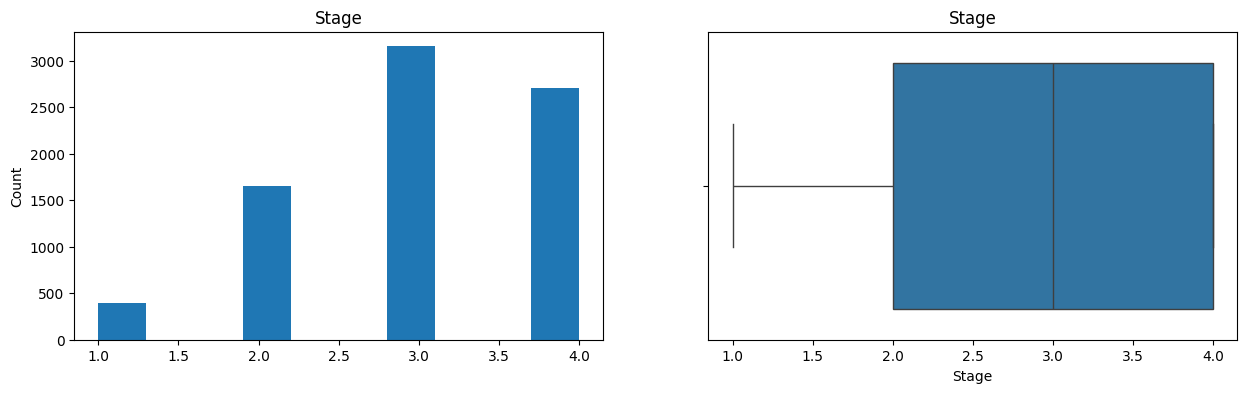

Tryglicerides
Skew : 2.63


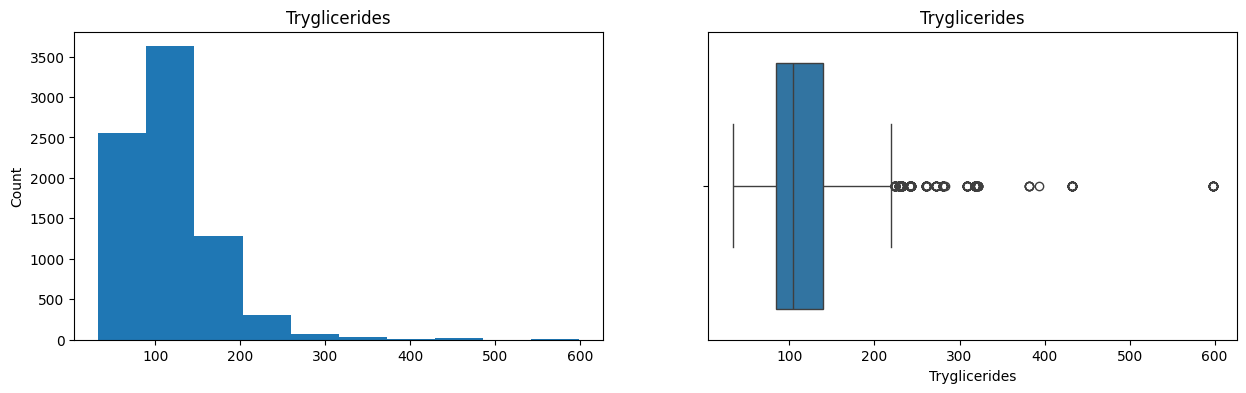

In [8]:
# Lets separate Numerical and categorical columns to visualize properly
num_col = df.select_dtypes(include=np.number).columns.difference(['id'])
cat_col = df.select_dtypes(include=['object']).columns
# Visualize Numerical columns

for col in num_col:
    print(col)
    print('Skew :', round(df[col].skew(),2))
    plt.figure(figsize = (15,4))
    plt.subplot(1,2,1)
    df[col].hist(grid = False)
    plt.ylabel('Count')
    plt.title(col)
    plt.subplot(1,2,2)
    plt.title(col)
    sns.boxplot(x=df[col])
    plt.show()

In [9]:
cat_col

Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status'], dtype='object')

Categorical Columns are : Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status'], dtype='object')


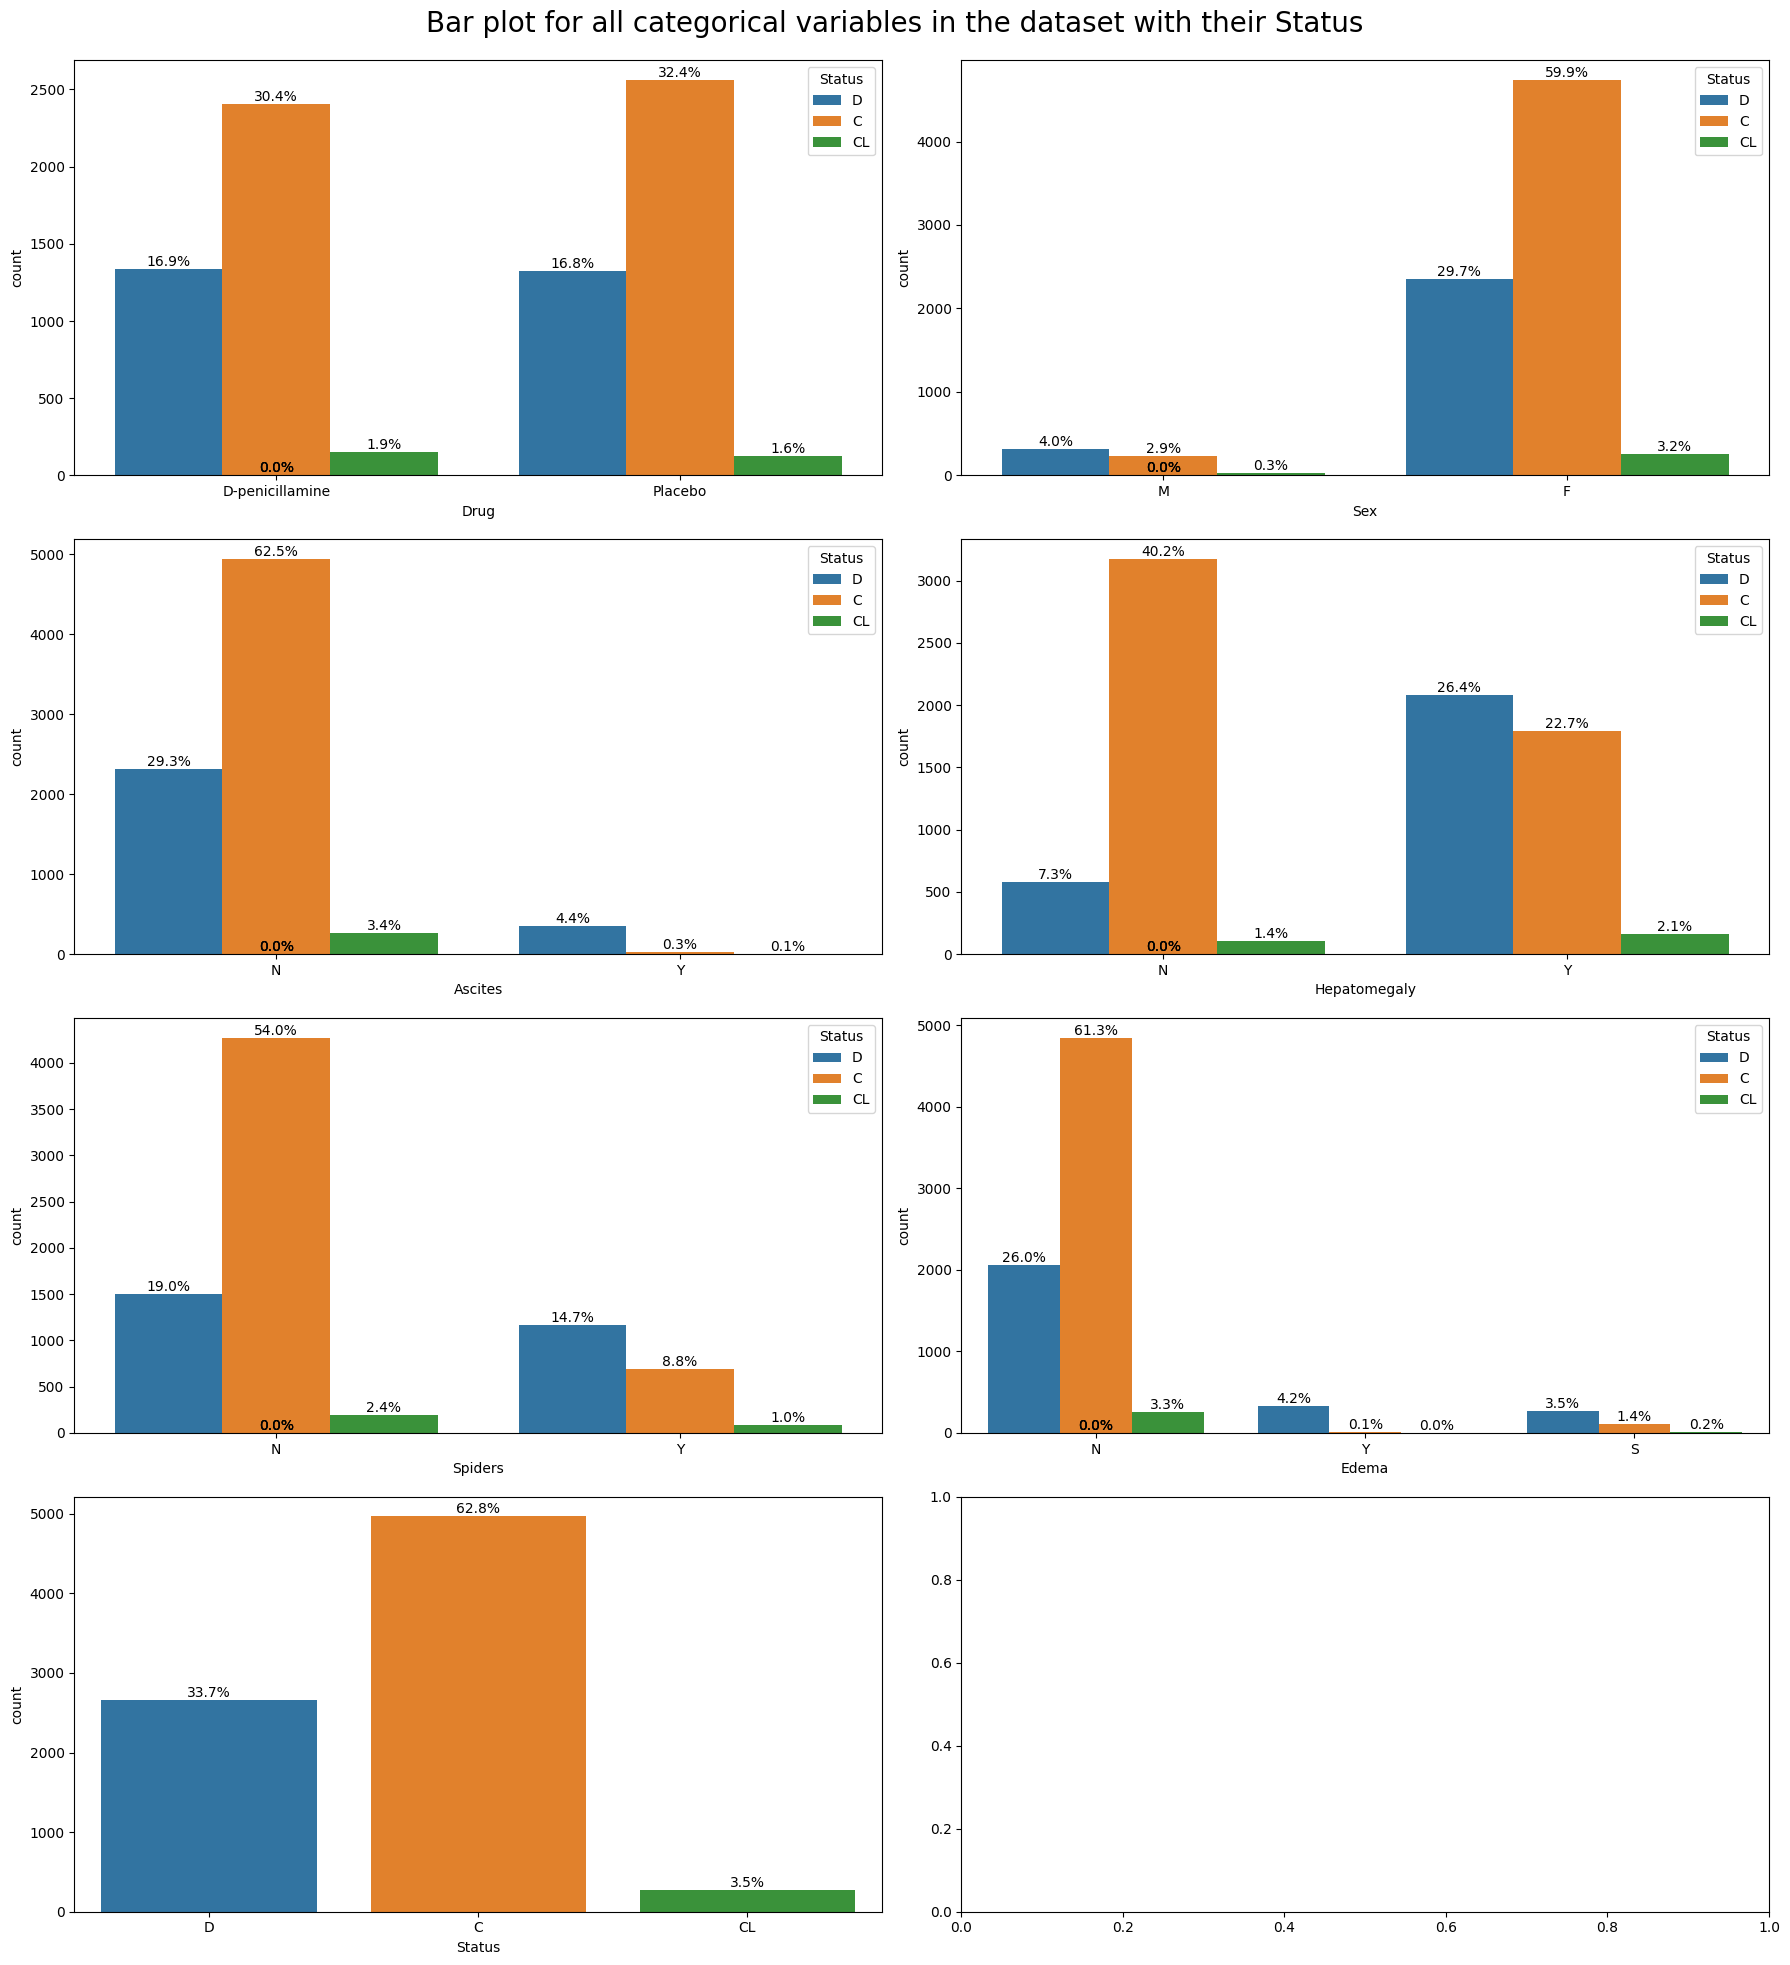

In [10]:
# Distribution of all Categorical columns
cat_col = df.select_dtypes(include=['object']).columns
print(f"Categorical Columns are : {cat_col}")
# Visualize Categorical columns 
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 20))
# Increase vertical spacing
plt.subplots_adjust(hspace=0.5)
# Set the supertitle
fig.suptitle('Bar plot for all categorical variables in the dataset with their Status\n', fontsize=20)
# Adjust the spacing between the supertitle and subplots
plt.subplots_adjust(top=0.95)
# Iterate over the columns and create count plots
for i, column in enumerate(cat_col):
    row = i // 2
    col = i % 2
    sns.countplot(ax=axes[row, col], x=column, data=df, hue='Status')
   
    total_count = len(df[column])

    for p in axes[row,col].patches:
        percentage = f'{100 * p.get_height() / total_count:.1f}%'
        x_pos = p.get_x() + p.get_width() / 2
        y_pos = p.get_height()
        axes[row,col].annotate(percentage, (x_pos, y_pos), ha='center', va='bottom')
# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

---
# Observation 2
1. The dataset is not a normalize data as females (92.8%) are much more than males (only 7.2%)
2. The ratio of alive after liver transplantation (3.5%) is also much smaller than alive ones.

<Axes: >

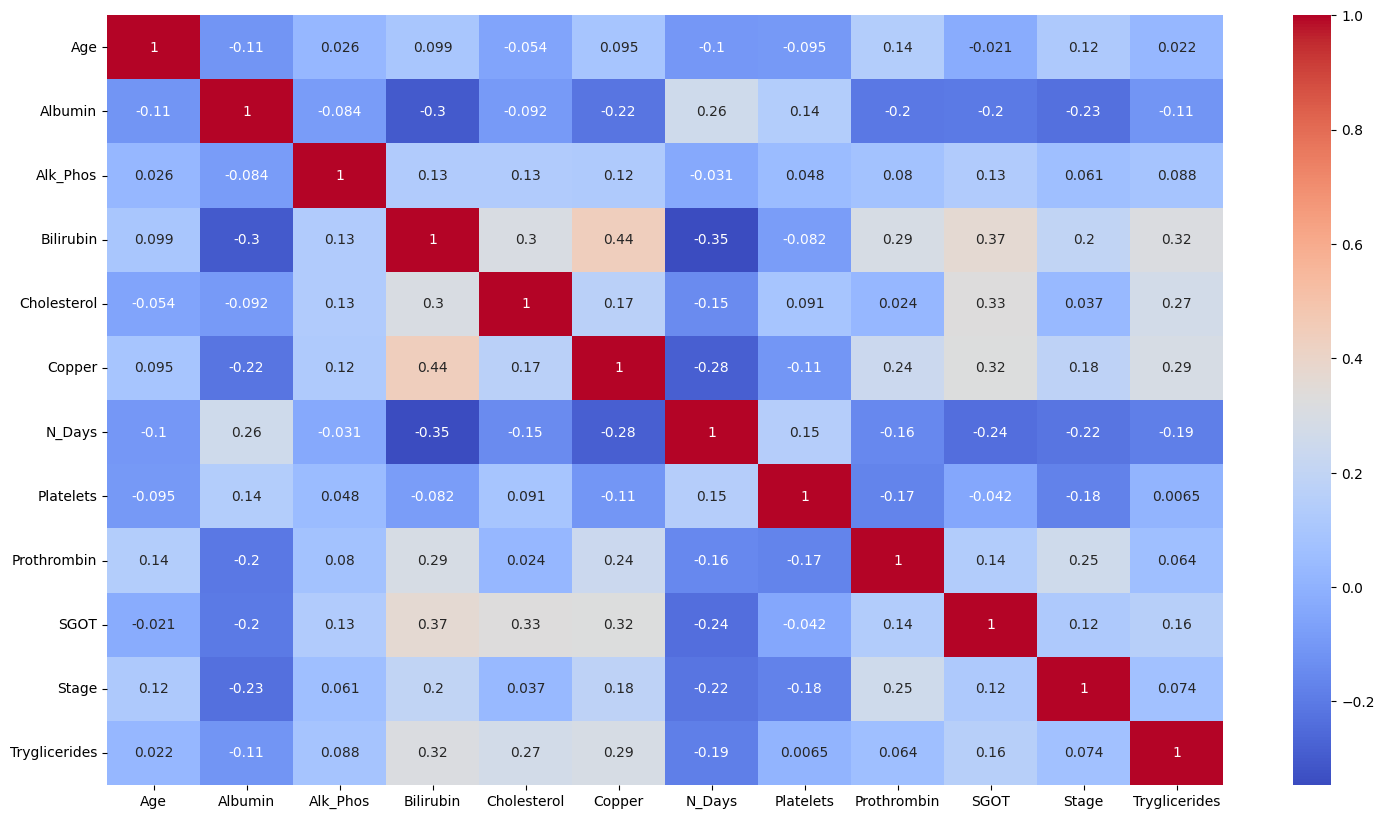

In [11]:
# Visualization of correlation in numerical columns
plt.figure(figsize=(18,10))
sns.heatmap(df[num_col].corr(),cbar = True, cmap='coolwarm', annot=True)

**Figure-:** Shows the Correlation of all Numerical Columns 

---
# Observation 3
1. There is no significance correlation is shown in any feature in the dataset

In [12]:
# first we have to check the dataset
df['Status'].value_counts()


Status
C     4965
D     2665
CL     275
Name: count, dtype: int64

In [13]:
import plotly.express as px
# piechart
df_pie = df['Status'].value_counts().reset_index()
df_pie.columns = ['Status', 'count']
fig_pie = px.pie(df_pie, values='count', names='Status', title="Pie Plot showing distribution of the Status")

fig_pie.show()

In [14]:
df.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

In [15]:
# create sunburst plot on the dataset

# Create a sunburst plot
fig = px.sunburst(df, 
                  path=['Status', 'Drug','Stage', 'Sex'], 
                  values='N_Days' , color='Sex', title="Chart shows the distribution of the Status with Drugs, Stages and Gender")
# Show the plot
fig.show()


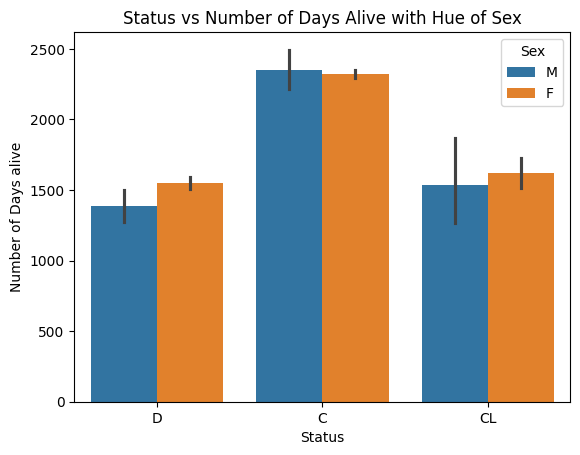

In [16]:
# Creating the Bar plot with hue
sns.barplot(x=df['Status'], y=df['N_Days'], hue=df['Sex'])

# Adding labels and title
plt.xlabel('Status')
plt.ylabel('Number of Days alive')
plt.title('Status vs Number of Days Alive with Hue of Sex')

# Display the Bar plot
plt.show()